In [2]:
# gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# modified by Ross MacWhinney for Homework 3
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/
from __future__ import print_function
import os
import pandas as pd
import numpy as np

In [19]:
!curl https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv?accessType=DOWNLOAD > energy16.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8086k    0 8086k    0     0  4394k      0 --:--:--  0:00:01 --:--:-- 4396k


In [20]:
# move the downloaded data to PUI data
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ram844/PUIdata


In [21]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ram844/PUIdata


In [22]:
# move the data
!mv energy16.csv $PUIDATA

In [23]:
#test if the data is there
!ls $PUIDATA

airquality.csv	dhsdaily.csv  energy16.csv	  muninrg.csv
collision.csv	energy14.csv  familyviolence.csv


In [24]:
#read in the data with pandas
nrg = pd.read_csv("%s/energy16.csv"%os.getenv("PUIDATA"))

In [25]:
#print the fist 8 lines out
nrg.head(8)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
5,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,1084781; 1084780,525 East 68th Street,Not Available,...,414.2,04/27/2017 11:23:27 AM,No,In Compliance,40.761395,-73.957726,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,515 East 70th St,...,Not Available,04/27/2017 11:23:27 AM,Yes,In Compliance,40.765949,-73.953752,8.0,5.0,124.0,Lenox Hill-Roosevelt Island ...
7,10,2610789,North Shore Towers,2610789,North Shore Towers,4084890001,4084890001,4456886;4456885;4453535;4456888,270-10 Grand Central Parkway,269-271-10 Grand Central Parkway,...,151172.9,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.0,23.0,155101.0,Glen Oaks-Floral Park-New Hyde Park ...


In [26]:
#print the last 3 lines out
nrg.tail(3)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
11743,14990,4628296,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,267 6th Street,Not Available,...,103.6,03/23/2017 02:51:02 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,27 Prospect Park West,Not Available,...,92.7,04/26/2017 11:20:06 AM,NaN,NaN,40.670728,-73.971752,6.0,39.0,165.0,Park Slope-Gowanus ...
11745,14993,4952165,Tryad: 420 Clinton Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3019600022,3-01960-0022\t,3055969,420 Clinton Ave\t,Not Available,...,161.9,04/27/2017 06:37:53 AM,Yes,NaN,40.685549,-73.968310,2.0,35.0,199.0,Clinton Hill ...


In [27]:
#look at the columns available, those are the variables
nrg.columns

Index([u'Order', u'Property Id', u'Property Name', u'Parent Property Id',
       u'Parent Property Name', u'BBL - 10 digits',
       u'NYC Borough, Block and Lot (BBL) self-reported',
       u'NYC Building Identification Number (BIN)',
       u'Address 1 (self-reported)', u'Address 2', u'Postal Code',
       u'Street Number', u'Street Name', u'Borough', u'DOF Gross Floor Area',
       u'Primary Property Type - Self Selected',
       u'List of All Property Use Types at Property',
       u'Largest Property Use Type',
       u'Largest Property Use Type - Gross Floor Area (ft²)',
       u'2nd Largest Property Use Type',
       u'2nd Largest Property Use - Gross Floor Area (ft²)',
       u'3rd Largest Property Use Type',
       u'3rd Largest Property Use Type - Gross Floor Area (ft²)',
       u'Year Built', u'Number of Buildings - Self-reported', u'Occupancy',
       u'Metered Areas (Energy)', u'Metered Areas  (Water)',
       u'ENERGY STAR Score', u'Site EUI (kBtu/ft²)',
       u'Weather N

In [28]:
#count how many rows, those are the data points
nrg.size

704760

In [29]:
#select 2 columns only for plotting
nrg_2c = nrg[['Year Built', 'Property GFA - Self-Reported (ft²)']]

In [30]:
nrg_2c.head()

,Year Built,Property GFA - Self-Reported (ft²)
0,1963,762051
1,1969,3889181
2,1924,231342
3,1971,1305748
4,1932,179694


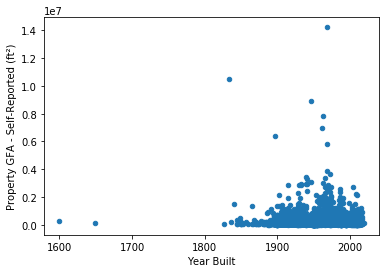

In [31]:
nrg_2c.plot.scatter(x="Year Built", y="Property GFA - Self-Reported (ft²)")

In [32]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


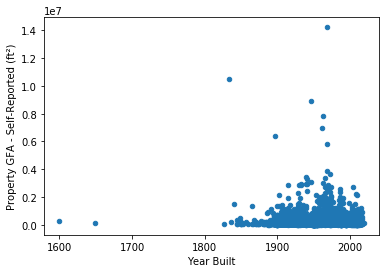

In [33]:
nrg_2c.plot.scatter(x="Year Built", y="Property GFA - Self-Reported (ft²)");
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

In [34]:
##Figure 1: Year built against Property gross floor area as reported by building owners to the 
##Mayor's Office of Sustainability on May, 2017.
##This scatterplot shows the time frame in which larger buildings were built 



In [37]:
##solution 2: solution 2: Use API and download a json file
url = "https://data.cityofnewyork.us/api/views/8u86-bviy/rows.json"

In [38]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [ ]:
# print it out
df.head(3)

In [287]:
#now select a date and 2 variables
dhs_3c = df[['date_of_census', 'single_adult_men_in_shelter', 'single_adult_women_in_shelter']]

In [288]:
dhs_3c.rename(columns = {'date_of_census':'Date of Census', 
               'single_adult_men_in_shelter':'Single Adult Men in Shelter', 
               'single_adult_women_in_shelter': 'Single Adult Women in Shelter'}, inplace=True)

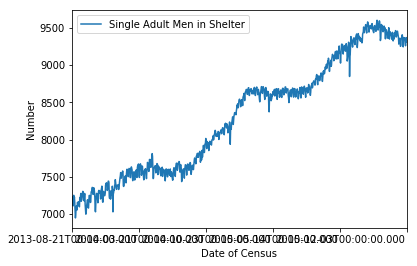

In [289]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = dhs_3c.plot(x='Date of Census', y='Single Adult Men in Shelter');
ax.set_ylabel("Number");

In [290]:
dhs_3c["Date of Census"] = dhs_3c["Date of Census"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


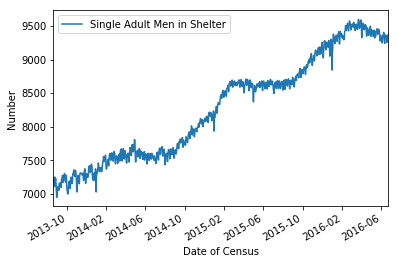

In [291]:
ax = dhs_3c.plot(x='Date of Census', y='Single Adult Men in Shelter')
ax.set_ylabel("Number");

In [292]:
##Figure 2: number of Single Adult Men in Shelter in NYC shelters as a function of time between 8/21/2013 and 9/16/2018. 
##The number peaks in Spring 2015 and hten declines slightly. There is an overall trend of significantly more single 
##adult men being added to the shelters over this period. 

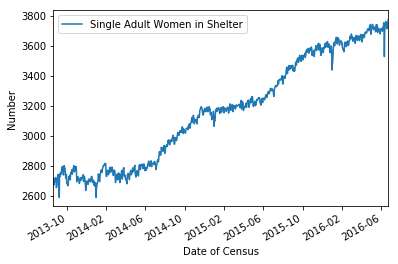

In [293]:
#plot the other columns
ax = dhs_3c.plot(x='Date of Census', y='Single Adult Women in Shelter')
ax.set_ylabel("Number");

In [295]:
##Figure 3: number of Single Adult Women in Shelter in NYC shelters as a function of time between 8/21/2013 and 9/16/2018. 
##The number climbs continually over this period and number of single adult women shelters is consistently about a 
##third of the number of single adult men 